In [60]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [61]:
df=pd.read_csv('/kaggle/input/credit-score-classification/train.csv')

In [62]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [63]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [64]:
df.columns=[x.lower() for x in df.columns]

In [65]:
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [66]:
df.shape

(100000, 28)

In [67]:
df.drop(['id', 'customer_id', 'month', 'name', 'ssn','type_of_loan','credit_history_age'],axis=1,inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       100000 non-null  object 
 1   occupation                100000 non-null  object 
 2   annual_income             100000 non-null  object 
 3   monthly_inhand_salary     84998 non-null   float64
 4   num_bank_accounts         100000 non-null  int64  
 5   num_credit_card           100000 non-null  int64  
 6   interest_rate             100000 non-null  int64  
 7   num_of_loan               100000 non-null  object 
 8   delay_from_due_date       100000 non-null  int64  
 9   num_of_delayed_payment    92998 non-null   object 
 10  changed_credit_limit      100000 non-null  object 
 11  num_credit_inquiries      98035 non-null   float64
 12  credit_mix                100000 non-null  object 
 13  outstanding_debt          100000 non-null  ob

In [69]:
df.duplicated().value_counts()

False    100000
Name: count, dtype: int64

In [70]:
df.isnull().sum().reset_index().rename(columns={'index':'feature_name',0:'null_counts'})

,feature_name,null_counts
0,age,0
1,occupation,0
2,annual_income,0
3,monthly_inhand_salary,15002
4,num_bank_accounts,0
5,num_credit_card,0
6,interest_rate,0
7,num_of_loan,0
8,delay_from_due_date,0
9,num_of_delayed_payment,7002


In [71]:
size_before_cleaning=df.shape
df=df[df.isnull().sum(axis=1)<3]
print("number of droped rows {}".format(size_before_cleaning[0]-df.shape[0]))

number of droped rows 101


In [72]:
df.head()

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,3,7,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,5,4,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [73]:
df.tail()

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,7,...,3.0,_,502.38,34.663572,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,7,...,3.0,_,502.38,40.565631,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6,...,3.0,Good,502.38,41.255522,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,NaN,...,3.0,Good,502.38,33.638208,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,25,Mechanic,39628.99_,3359.415833,4,6,7,2,18,6,...,3.0,Good,502.38,34.192463,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [74]:
def amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

In [75]:
df['amount_invested_monthly']=df['amount_invested_monthly'].apply(amount_invested_monthly)
df['amount_invested_monthly']=df['amount_invested_monthly'].astype('float')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99899 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       99899 non-null  object 
 1   occupation                99899 non-null  object 
 2   annual_income             99899 non-null  object 
 3   monthly_inhand_salary     84984 non-null  float64
 4   num_bank_accounts         99899 non-null  int64  
 5   num_credit_card           99899 non-null  int64  
 6   interest_rate             99899 non-null  int64  
 7   num_of_loan               99899 non-null  object 
 8   delay_from_due_date       99899 non-null  int64  
 9   num_of_delayed_payment    92977 non-null  object 
 10  changed_credit_limit      99899 non-null  object 
 11  num_credit_inquiries      97972 non-null  float64
 12  credit_mix                99899 non-null  object 
 13  outstanding_debt          99899 non-null  object 
 14  credit_util

In [77]:
def filter_delayed_payments(value):
    if '__' in str(value):
        return str(value).split('__')[1]
    elif '_' in str(value):
        return str(value).replace('_','')
   # elif str(value)=='_':
   #     return str(value)
    else:
        str(value)

In [78]:
df['num_of_delayed_payment']=df['num_of_delayed_payment'].apply(filter_delayed_payments)
df['num_of_delayed_payment']=df['num_of_delayed_payment'].astype(np.float64)

# Filter General

In [79]:
def filter_general(value):
    value = str(value)  # Ensure it's a string
    if '_' in value:
        return value.split('_')[1]
    return value  # Return the value unchanged

In [80]:
# Dropping rows with invalid placeholders
df.drop(df[df['age'] == '...'].index, inplace=True)
df.drop(df[df['monthly_balance'] == '333333333333333333333333333__'].index, inplace=True)
df.drop(df[df['monthly_balance'] == '...'].index, inplace=True)
df.drop(df[df['outstanding_debt'] == '...'].index, inplace=True)

# Cleaning columns
for i in ['age', 'annual_income', 'num_of_loan', 'outstanding_debt', 'monthly_balance']:
    df[i] = df[i].apply(filter_general)  # Apply filter function
    df[i] = df[i].replace('', np.nan)  # Replace empty strings with NaN
    df[i] = df[i].astype(np.float64)  # Convert to float
    print(i + ' successfully cleaned')

age successfully cleaned
annual_income successfully cleaned
num_of_loan successfully cleaned
outstanding_debt successfully cleaned
monthly_balance successfully cleaned


In [81]:
df['changed_credit_limit']=df['changed_credit_limit'].apply(lambda x:x.split('-')[-1])
df.drop(df[df['changed_credit_limit']=='_'].index,inplace=True)
df['changed_credit_limit']=df['changed_credit_limit'].astype('float')

In [82]:
df['payment_behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [83]:
df['occupation']=df['occupation'].replace('_______',np.nan)
df['occupation']=df['occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [84]:
df['credit_mix']=df['credit_mix'].replace('_',np.nan)
df['credit_mix']=df['credit_mix'].fillna(np.random.choice(pd.Series(['Good', 'Standard', 'Bad'])))

In [85]:
df['payment_of_min_amount']=df['payment_of_min_amount'].replace('NM',np.nan)
df['payment_of_min_amount']=df['payment_of_min_amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [86]:
df['payment_behaviour']=df['payment_behaviour'].replace('!@9#%8',np.nan)
df['payment_behaviour']=df['payment_behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'])))

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97808 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       92978 non-null  float64
 1   occupation                97808 non-null  object 
 2   annual_income             90964 non-null  float64
 3   monthly_inhand_salary     83209 non-null  float64
 4   num_bank_accounts         97808 non-null  int64  
 5   num_credit_card           97808 non-null  int64  
 6   interest_rate             97808 non-null  int64  
 7   num_of_loan               93130 non-null  float64
 8   delay_from_due_date       97808 non-null  int64  
 9   num_of_delayed_payment    2684 non-null   float64
 10  changed_credit_limit      97808 non-null  float64
 11  num_credit_inquiries      95924 non-null  float64
 12  credit_mix                97808 non-null  object 
 13  outstanding_debt          96823 non-null  float64
 14  credit_util

In [88]:
for i in ['age','annual_income','monthly_inhand_salary','num_of_loan','num_of_delayed_payment','num_credit_inquiries','outstanding_debt','amount_invested_monthly','monthly_balance']:
    df[i].fillna(df[i].median(),inplace=True)

In [89]:
df.head()

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,13.0,...,4.0,Bad,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,3091.000000,3,4,3,4.0,-1,13.0,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,23.0,Scientist,19114.12,3091.000000,3,4,3,4.0,5,13.0,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,13.0,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,23.0,Scientist,19114.12,3091.000000,3,4,3,4.0,8,13.0,...,4.0,Good,809.98,27.262259,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,Good


In [90]:
df.isnull().sum()

age                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
payment_of_min_amount       0
total_emi_per_month         0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
dtype: int64

In [91]:
df['monthly_balance'].unique()

array([312.49408868, 284.6291625 , 223.45130973, ..., 516.80908327,
       319.16497853, 393.67369556])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97808 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       97808 non-null  float64
 1   occupation                97808 non-null  object 
 2   annual_income             97808 non-null  float64
 3   monthly_inhand_salary     97808 non-null  float64
 4   num_bank_accounts         97808 non-null  int64  
 5   num_credit_card           97808 non-null  int64  
 6   interest_rate             97808 non-null  int64  
 7   num_of_loan               97808 non-null  float64
 8   delay_from_due_date       97808 non-null  int64  
 9   num_of_delayed_payment    97808 non-null  float64
 10  changed_credit_limit      97808 non-null  float64
 11  num_credit_inquiries      97808 non-null  float64
 12  credit_mix                97808 non-null  object 
 13  outstanding_debt          97808 non-null  float64
 14  credit_util

In [93]:
#df.select_dtypes(include='object').describe()

In [94]:
df_cat=df.select_dtypes(include='object')
df_cat.describe()

,occupation,credit_mix,payment_of_min_amount,payment_behaviour,credit_score
count,97808,97808,97808,97808,97808
unique,15,3,2,6,3
top,Scientist,Bad,Yes,Low_spent_Small_value_payments,Standard
freq,13065,38328,62899,32363,52027


In [95]:
for cat_col in df_cat:
    print(df_cat[cat_col].value_counts())
    print('\n##################')

occupation
Scientist        13065
Lawyer            6418
Architect         6235
Engineer          6206
Mechanic          6162
Accountant        6126
Developer         6106
Media_Manager     6098
Teacher           6084
Entrepreneur      6034
Doctor            5955
Journalist        5940
Manager           5838
Musician          5786
Writer            5755
Name: count, dtype: int64

##################
credit_mix
Bad         38328
Standard    35692
Good        23788
Name: count, dtype: int64

##################
payment_of_min_amount
Yes    62899
No     34909
Name: count, dtype: int64

##################
payment_behaviour
Low_spent_Small_value_payments      32363
High_spent_Medium_value_payments    17128
Low_spent_Medium_value_payments     13556
High_spent_Large_value_payments     13429
High_spent_Small_value_payments     11115
Low_spent_Large_value_payments      10217
Name: count, dtype: int64

##################
credit_score
Standard    52027
Poor        28329
Good        17452
Name: coun

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

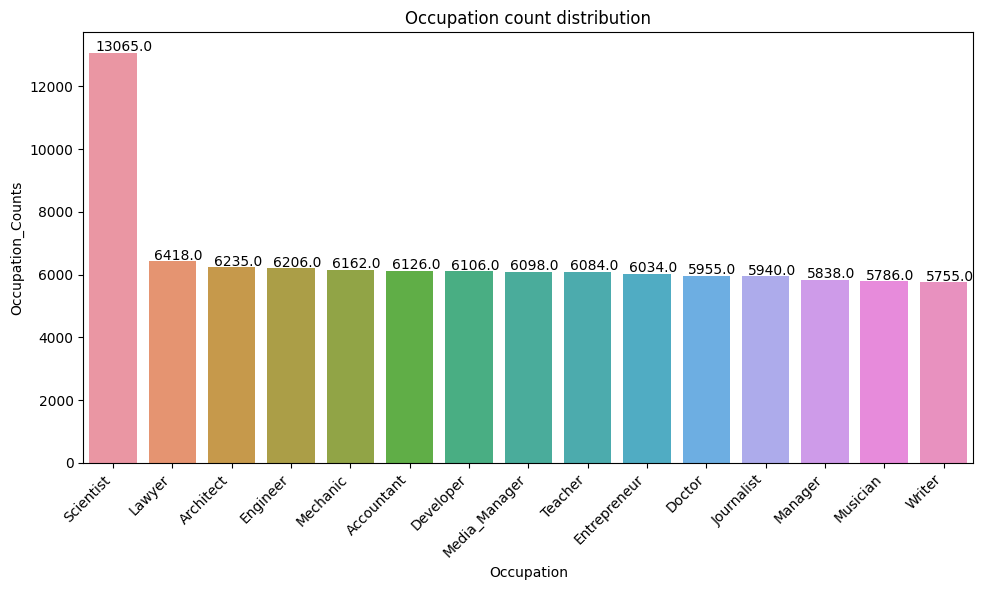

In [97]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='occupation', data=df, order=df['occupation'].value_counts().index)
plt.title('Occupation count distribution')
plt.xlabel('Occupation')
plt.ylabel('Occupation_Counts')
plt.xticks(rotation=45, ha='right')  # Rotate labels
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 50))
plt.tight_layout() #this is very important, it adjusts the padding.
plt.show()

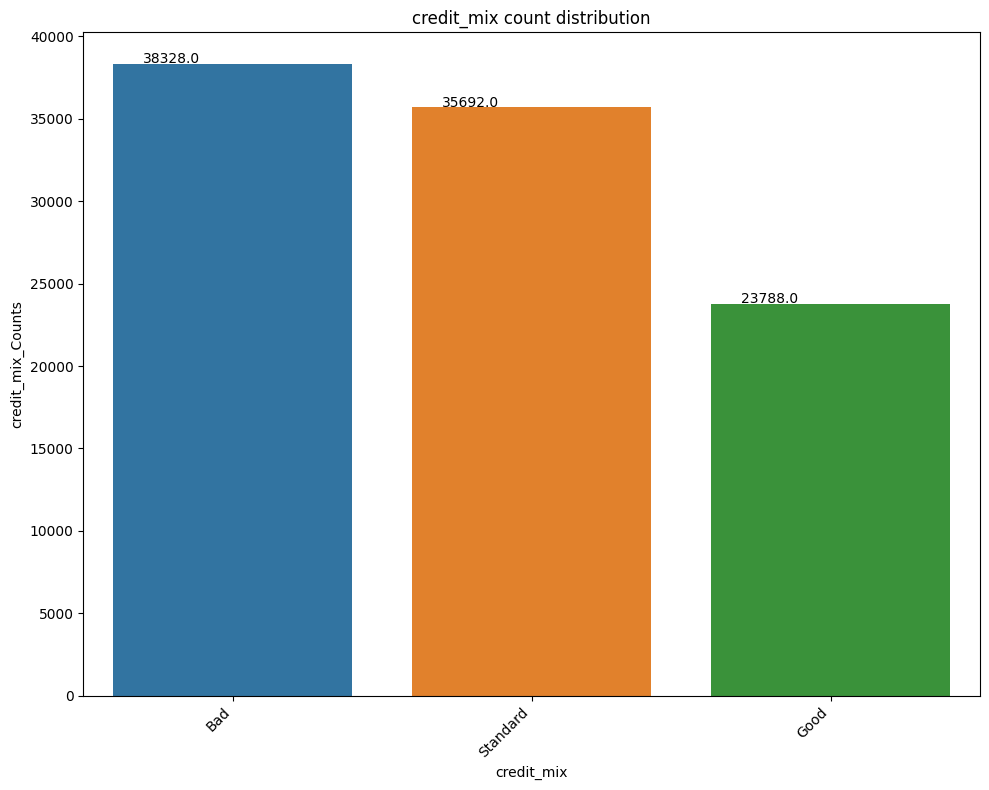

In [98]:

plt.figure(figsize=(10, 8))
ax = sns.countplot(x='credit_mix', data=df, order=df['credit_mix'].value_counts().index)
plt.title('credit_mix count distribution')
plt.xlabel('credit_mix')
plt.ylabel('credit_mix_Counts')
plt.xticks(rotation=45, ha='right')  # Rotate labels
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 50))
plt.tight_layout() #this is very important, it adjusts the padding.
plt.show()

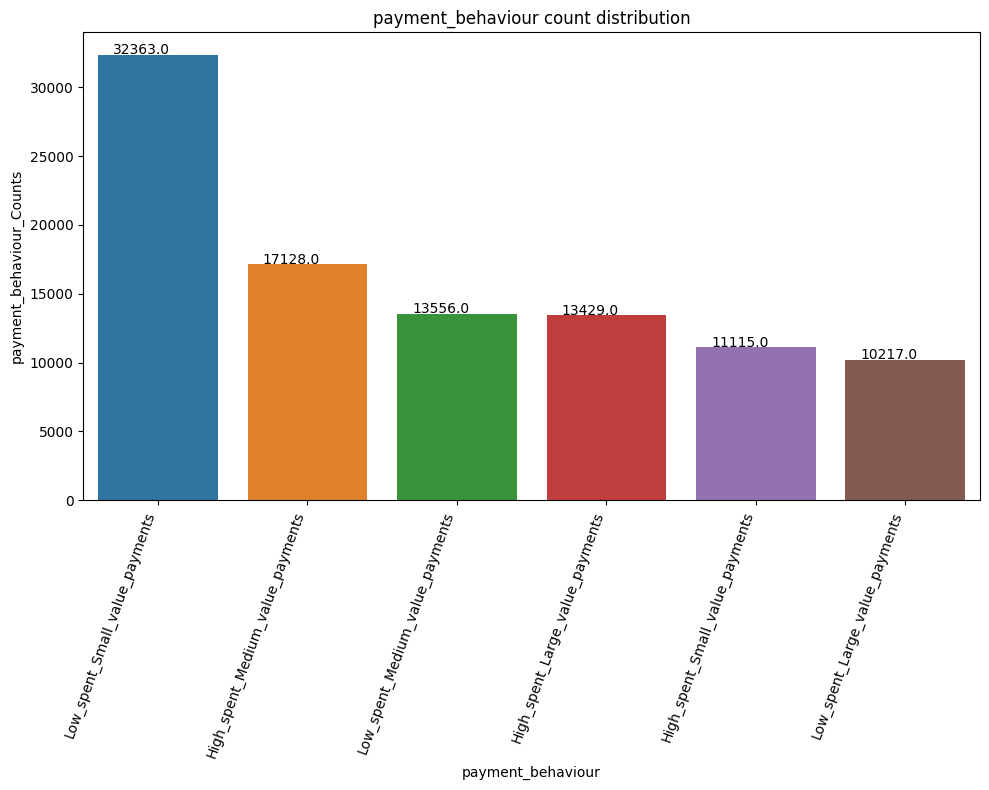

In [99]:

plt.figure(figsize=(10, 8))
ax = sns.countplot(x='payment_behaviour', data=df, order=df['payment_behaviour'].value_counts().index)
plt.title('payment_behaviour count distribution')
plt.xlabel('payment_behaviour')
plt.ylabel('payment_behaviour_Counts')
plt.xticks(rotation=70, ha='right')  # Rotate labels
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 50))
plt.tight_layout() #this is very important, it adjusts the padding.
plt.show()

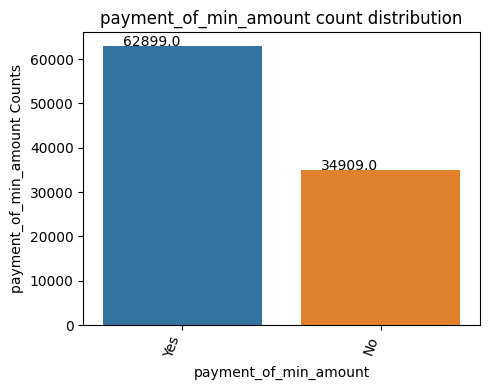

In [100]:

plt.figure(figsize=(5, 4))
ax = sns.countplot(x='payment_of_min_amount', data=df, order=df['payment_of_min_amount'].value_counts().index)
plt.title('payment_of_min_amount count distribution')
plt.xlabel('payment_of_min_amount')
plt.ylabel('payment_of_min_amount Counts')
plt.xticks(rotation=70, ha='right')  # Rotate labels
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 50))
plt.tight_layout() #this is very important, it adjusts the padding.
plt.show()

In [101]:
df.columns

Index(['age', 'occupation', 'annual_income', 'monthly_inhand_salary',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'payment_of_min_amount',
       'total_emi_per_month', 'amount_invested_monthly', 'payment_behaviour',
       'monthly_balance', 'credit_score'],
      dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97808 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       97808 non-null  float64
 1   occupation                97808 non-null  object 
 2   annual_income             97808 non-null  float64
 3   monthly_inhand_salary     97808 non-null  float64
 4   num_bank_accounts         97808 non-null  int64  
 5   num_credit_card           97808 non-null  int64  
 6   interest_rate             97808 non-null  int64  
 7   num_of_loan               97808 non-null  float64
 8   delay_from_due_date       97808 non-null  int64  
 9   num_of_delayed_payment    97808 non-null  float64
 10  changed_credit_limit      97808 non-null  float64
 11  num_credit_inquiries      97808 non-null  float64
 12  credit_mix                97808 non-null  object 
 13  outstanding_debt          97808 non-null  float64
 14  credit_util

In [103]:
df['occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [104]:
df['occupation'] = df['occupation'].map({'Scientist':1, 'Accountant':2, 'Teacher':3, 'Engineer':4, 'Entrepreneur':5,
       'Developer':6, 'Lawyer':7, 'Media_Manager':8, 'Doctor':9, 'Journalist':10,
       'Manager':11, 'Musician':12, 'Mechanic':13, 'Writer':14, 'Architect':15})

In [105]:
df['credit_mix'].unique()

array(['Bad', 'Good', 'Standard'], dtype=object)

In [106]:
df['credit_mix'] = df['credit_mix'].map({'Good':2,'Standard':1,'Bad':0})

In [107]:
df['payment_of_min_amount'].unique()

array(['No', 'Yes'], dtype=object)

In [108]:
df['payment_of_min_amount'] = df['payment_of_min_amount'].map({'Yes':1,'No':0})

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97808 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       97808 non-null  float64
 1   occupation                97808 non-null  int64  
 2   annual_income             97808 non-null  float64
 3   monthly_inhand_salary     97808 non-null  float64
 4   num_bank_accounts         97808 non-null  int64  
 5   num_credit_card           97808 non-null  int64  
 6   interest_rate             97808 non-null  int64  
 7   num_of_loan               97808 non-null  float64
 8   delay_from_due_date       97808 non-null  int64  
 9   num_of_delayed_payment    97808 non-null  float64
 10  changed_credit_limit      97808 non-null  float64
 11  num_credit_inquiries      97808 non-null  float64
 12  credit_mix                97808 non-null  int64  
 13  outstanding_debt          97808 non-null  float64
 14  credit_util

In [110]:
df.head()

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,23.0,1,19114.12,1824.843333,3,4,3,4.0,3,13.0,...,4.0,0,809.98,26.822620,0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,1,19114.12,3091.000000,3,4,3,4.0,-1,13.0,...,4.0,2,809.98,31.944960,0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,23.0,1,19114.12,3091.000000,3,4,3,4.0,5,13.0,...,4.0,2,809.98,31.377862,0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,1,19114.12,1824.843333,3,4,3,4.0,6,13.0,...,4.0,2,809.98,24.797347,0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,23.0,1,19114.12,3091.000000,3,4,3,4.0,8,13.0,...,4.0,2,809.98,27.262259,0,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,Good


In [111]:
df['payment_behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [112]:
df['payment_behaviour'] = df['payment_behaviour'].map({'High_spent_Small_value_payments':1,
       'Low_spent_Large_value_payments':2, 'Low_spent_Small_value_payments':3,
       'High_spent_Medium_value_payments':4,
       'High_spent_Large_value_payments':5,
       'Low_spent_Medium_value_payments':6})

In [113]:
corrmat=df.iloc[:, :-1].corr()
corrmat

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
age,1.000000,0.002615,0.000191,0.003048,0.003079,-0.002469,-0.006422,-0.000036,-0.009781,0.001007,-0.002771,-0.003039,0.007454,-0.001877,0.002842,-0.007030,-0.000433,0.003773,-0.000560,0.005526
occupation,0.002615,1.000000,-0.001415,0.002331,-0.001427,0.000071,0.006987,0.000023,-0.007947,0.001394,-0.009497,0.000394,-0.002004,-0.002340,-0.000825,-0.001283,-0.002971,0.001043,0.006905,0.002169
annual_income,0.000191,-0.001415,1.000000,0.027250,-0.005052,0.001627,-0.002034,0.002534,-0.010969,-0.001054,0.000276,0.003402,0.006126,-0.002467,0.009653,-0.009435,-0.002452,-0.004169,0.007447,0.018966
monthly_inhand_salary,0.003048,0.002331,0.027250,1.000000,-0.010212,-0.004514,-0.005588,-0.008963,-0.227619,0.002874,-0.159768,-0.007923,0.235934,-0.243995,0.157449,-0.252117,0.006317,0.055100,0.151248,0.628411
num_bank_accounts,0.003079,-0.001427,-0.005052,-0.010212,1.000000,-0.002022,-0.003777,-0.001218,0.015767,-0.001099,0.007837,-0.001482,-0.012835,0.016737,-0.002498,0.008748,-0.001498,0.002495,-0.001255,-0.008370
num_credit_card,-0.002469,0.000071,0.001627,-0.004514,-0.002022,1.000000,-0.005421,0.002198,0.008826,-0.001724,0.005089,-0.003300,-0.007502,0.007079,-0.003833,0.010588,0.000340,-0.001705,0.002714,-0.005565
interest_rate,-0.006422,0.006987,-0.002034,-0.005588,-0.003777,-0.005421,1.000000,0.001351,0.010092,0.009447,0.000829,-0.001612,-0.003704,0.010649,0.000270,0.007449,0.002349,-0.002010,-0.003820,-0.007096
num_of_loan,-0.000036,0.000023,0.002534,-0.008963,-0.001218,0.002198,0.001351,1.000000,0.011942,0.000289,0.015861,-0.000254,-0.015950,0.023015,-0.004455,0.016125,0.001617,-0.000109,-0.003538,-0.018622
delay_from_due_date,-0.009781,-0.007947,-0.010969,-0.227619,0.015767,0.008826,0.010092,0.011942,1.000000,0.003722,0.296618,0.010988,-0.515210,0.568659,-0.062535,0.459867,-0.003482,-0.012026,-0.037953,-0.277136
num_of_delayed_payment,0.001007,0.001394,-0.001054,0.002874,-0.001099,-0.001724,0.009447,0.000289,0.003722,1.000000,0.001240,-0.001340,-0.003834,0.002281,-0.002943,0.006132,-0.001891,0.001654,-0.000782,0.000228


<Axes: >

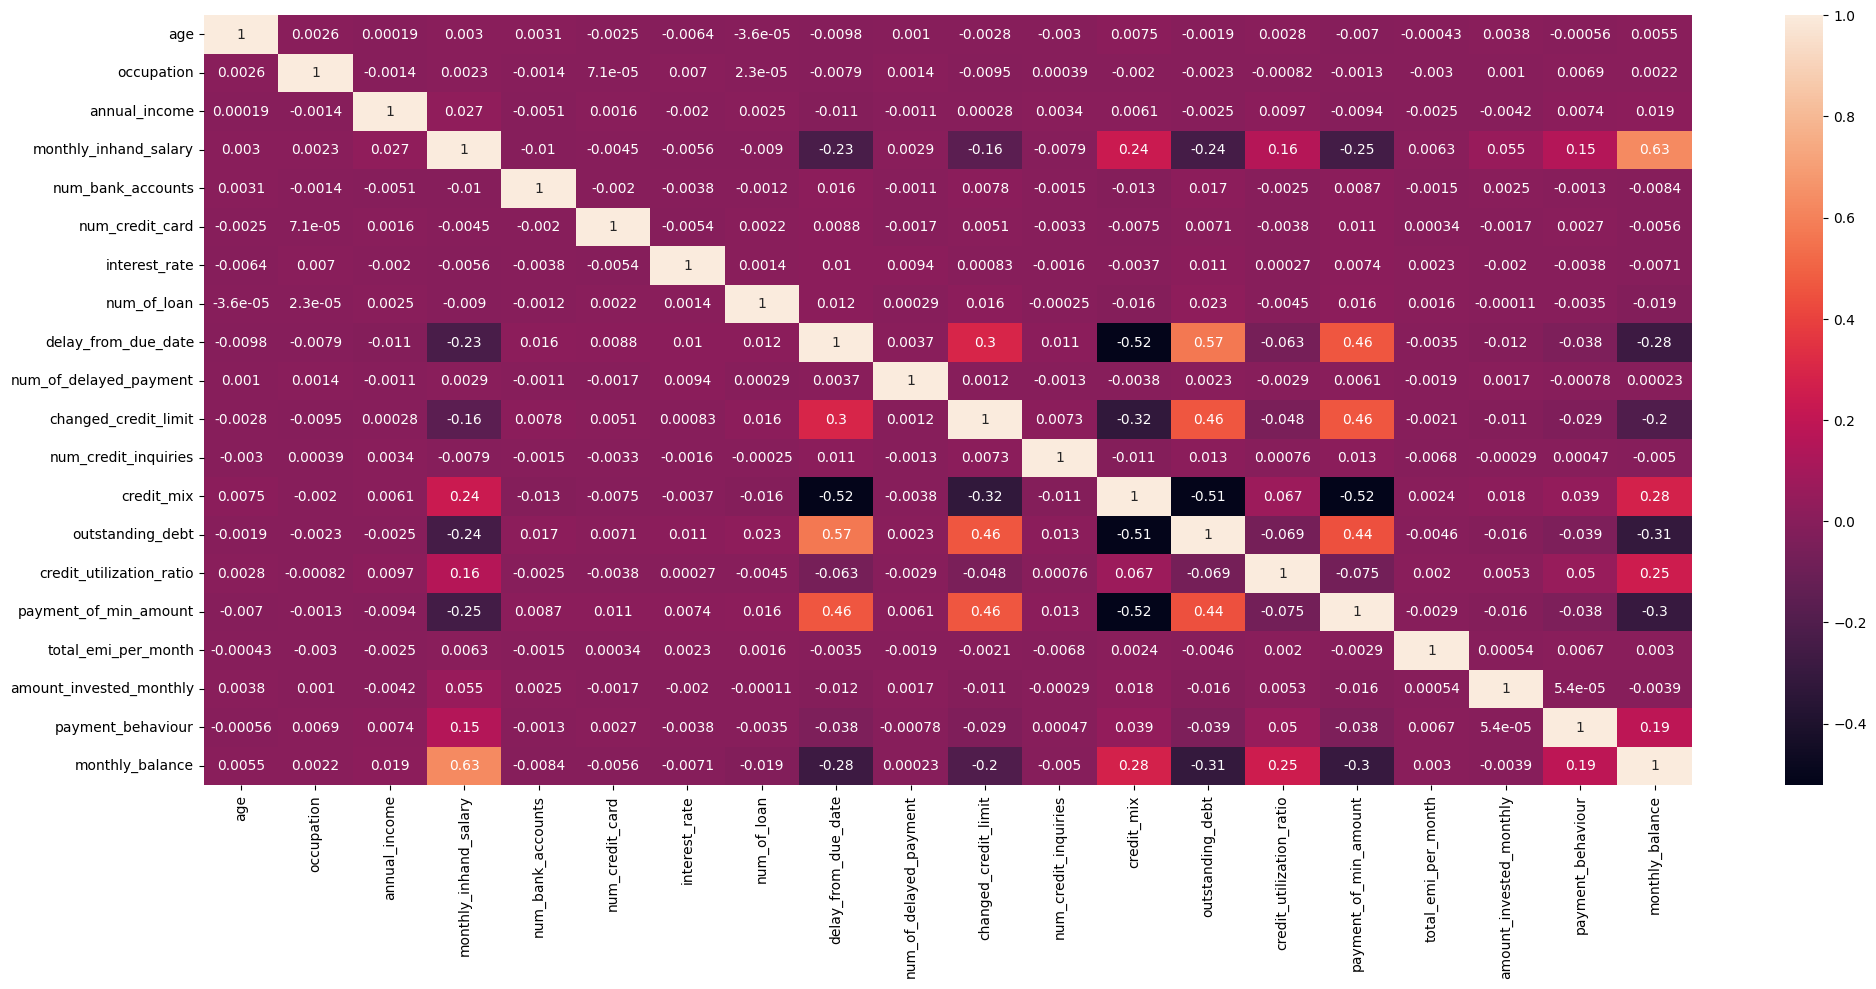

In [114]:
plt.figure(figsize=(24,10))
sns.heatmap(corrmat,annot=True)

In [115]:
df.isnull().sum()

age                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
payment_of_min_amount       0
total_emi_per_month         0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
dtype: int64

In [116]:
X = df.iloc[:, :-1].values
y = df['credit_score'].values

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [119]:
model = RandomForestClassifier(n_estimators=300, class_weight='balanced')

In [120]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300)

In [121]:
predictions = model.predict(X_test)

In [122]:
print('Classification Report', classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, predictions))
print('\n')
print('Accuracy Score', accuracy_score(y_test, predictions))

Classification Report               precision    recall  f1-score   support

        Good       0.72      0.67      0.69      5789
        Poor       0.78      0.77      0.77      9381
    Standard       0.78      0.81      0.80     17107

    accuracy                           0.77     32277
   macro avg       0.76      0.75      0.75     32277
weighted avg       0.77      0.77      0.77     32277



Confusion Matrix [[ 3867    46  1876]
 [  225  7185  1971]
 [ 1275  1944 13888]]


Accuracy Score 0.7726864330637916


In [123]:
df.iloc[1]

age                               23.0
occupation                           1
annual_income                 19114.12
monthly_inhand_salary           3091.0
num_bank_accounts                    3
num_credit_card                      4
interest_rate                        3
num_of_loan                        4.0
delay_from_due_date                 -1
num_of_delayed_payment            13.0
changed_credit_limit             11.27
num_credit_inquiries               4.0
credit_mix                           2
outstanding_debt                809.98
credit_utilization_ratio      31.94496
payment_of_min_amount                0
total_emi_per_month          49.574949
amount_invested_monthly     118.280222
payment_behaviour                    2
monthly_balance             284.629162
credit_score                      Good
Name: 1, dtype: object

In [124]:
input_features = np.array([[23.0, 1, 19114.12, 3091.0, 3,4, 3,4.0,-1,13.0,11.27,4.0,2,809.98,31.94496,0,49.574949,118.280222,2,284.629162]])  

input_features = input_features.reshape(1, -1)

In [125]:
predicted_score = model.predict(input_features)

print("Predicted Credit Score:", predicted_score[0])

Predicted Credit Score: Good


In [142]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [143]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [144]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [145]:
predictions = gbc.predict(X_test)

In [146]:
print('Classification Report', classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, predictions))
print('\n')
print('Accuracy Score', accuracy_score(y_test, predictions))

Classification Report               precision    recall  f1-score   support

        Good       0.58      0.63      0.60      5789
        Poor       0.73      0.63      0.68      9381
    Standard       0.73      0.76      0.75     17107

    accuracy                           0.70     32277
   macro avg       0.68      0.67      0.67     32277
weighted avg       0.70      0.70      0.70     32277



Confusion Matrix [[ 3639   122  2028]
 [  656  5903  2822]
 [ 2022  2023 13062]]


Accuracy Score 0.7003129163181213


In [147]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz

In [148]:
dcsntre = DecisionTreeClassifier(criterion="gini",random_state=100, max_depth=3, min_samples_leaf=5)

In [149]:
dcsntre.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [150]:
predictions = dcsntre.predict(X_test)

In [151]:
print('Classification Report', classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, predictions))
print('\n')
print('Accuracy Score', accuracy_score(y_test, predictions))

Classification Report               precision    recall  f1-score   support

        Good       0.52      0.59      0.55      5789
        Poor       0.67      0.64      0.66      9381
    Standard       0.73      0.72      0.72     17107

    accuracy                           0.67     32277
   macro avg       0.64      0.65      0.64     32277
weighted avg       0.68      0.67      0.67     32277



Confusion Matrix [[ 3405   511  1873]
 [  712  6038  2631]
 [ 2442  2427 12238]]


Accuracy Score 0.6717167022957524


In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
log_reg = LogisticRegression(solver='liblinear', random_state=42)

In [154]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [139]:
predictions = log_reg.predict(X_test)

In [140]:
print('Classification Report', classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, predictions))
print('\n')
print('Accuracy Score', accuracy_score(y_test, predictions))

Classification Report               precision    recall  f1-score   support

        Good       0.48      0.02      0.03      5789
        Poor       0.63      0.42      0.51      9381
    Standard       0.57      0.87      0.69     17107

    accuracy                           0.59     32277
   macro avg       0.56      0.44      0.41     32277
weighted avg       0.57      0.59      0.52     32277



Confusion Matrix [[   91    97  5601]
 [   19  3965  5397]
 [   81  2186 14840]]


Accuracy Score 0.5854323512098398
